<h1 style="text-align: center;"><span style="color: #000000;"> Final Project: NYC Housing Data
</span></h1>
<h3 style="text-align: center;"><span style="color: #000000;"> Created by: Thomas Mallinson, Bryan Armbrust, and Alberto Ferrera
</span></h3>

## 1. Introduction

### 1.1. Data Description

The data is provided for the Business Analytics Competition at Manhattan College. We include the following variables with data from 2005 - 2018:

<table style="width:100%">
 <tr>
  <th style="text-align: left;"> Variable Name</th>
  <th style="text-align: left;"> Description</th>
 </tr>
 <tr>
  <td style="text-align: left;">Sub-Burough Area</td>
  <td style="text-align: left;">Area the sub-borough comprises</td>
 </tr>
 <tr>
  <td style="text-align: left;">homeowner_income</td>
  <td style="text-align: left;">The median owner-occupied household's total income of all members of the household aged 15 years or older.</td>
 </tr>
 <tr>
  <td style="text-align: left;">year</td>
  <td style="text-align: left;">Year recorded</td>
 </tr>
 <tr>
  <td style="text-align: left;">renter_income</td>
  <td style="text-align: left;">The median renter household's total income of all members of the household aged 15 years or older.</td>
 </tr>
 <tr>
  <td style="text-align: left;">pov_rate</td>
  <td style="text-align: left;">The number of people below the poverty threshold divided by the
number of people for whom poverty status was determined.</td>
 </tr>
 <tr>
  <td style="text-align: left;">population</td>
  <td style="text-align: left;">All people, both children and adults, living in a given geographic area.</td>
 </tr>
 <tr>
  <td style="text-align: left;">home_own_rate</td>
  <td style="text-align: left;">The number of owner-occupied units divided by the total number of
occupied housing units.</td>
 </tr>
 <tr>
  <td style="text-align: left;">FHA_loans</td>
  <td style="text-align: left;">The percentage of all first-lien loan originations, for the purchase of
an owner-occupied home, condominium, 
or cooperative apartment that were insured or guaranteed by the FHA or VA, as reported by HMDA.</td>
 </tr>
 <tr>
  <td style="text-align: left;">LMI</td>
  <td style="text-align: left;">The share of all first-lien loan originations, for the purchase of an
owner-occupied 1-4 family building, 
condominium, or cooperative apartment, that were made to low-to moderate-income borrowers.</td>
 </tr>
 <tr>
  <td style="text-align: left;">hunits</td>
  <td style="text-align: left;">The number of housings units, which can include a house, apartment,
mobile home, group of rooms, or single 
room that is occupied (or is vacant and intended for occupancy) as separate living quarters.</td>
 </tr>
 <tr>
  <td style="text-align: left;">rent_burden</td>
  <td style="text-align: left;">The median percentage of gross, pre-tax income spent on gross rent by NYC renter households.</td>
 </tr>
 <tr>
  <td style="text-align: left;">pct_asian</td>
  <td style="text-align: left;">Percentage of the total population that identifies as asian (nonhispanic)</td>
 </tr>
 <tr>
  <td style="text-align: left;">pct_black</td>
  <td style="text-align: left;">Percentage of the total population that identifies as black (nonhispanic)</td>
 </tr>
 <tr>
  <td style="text-align: left;">pct_hispanic</td>
  <td style="text-align: left;">Percentage of the total population that identifies as Hispanic (of any
race)</td>
 </tr>
 <tr>
  <td style="text-align: left;">pct_white</td>
  <td style="text-align: left;">Percentage of the total population that identifies as white (nonhispanic)</td>
 </tr>
 <tr>
  <td style="text-align: left;">single_fam_home_price</td>
  <td style="text-align: left;">The median price per unit for one unit buildings.</td>
 </tr>
 <tr>
  <td style="text-align: left;">condo_price</td>
  <td style="text-align: left;">The median price per unit for condominiums.</td>
 </tr>
 <tr>
  <td style="text-align: left;">single_fam_home_sales</td>
  <td style="text-align: left;">The number of transactions of 1 family residential properties that
have a non-trivial price and the sale 
must not be marked as 'insignificant' by the Department of Finance.</td>
 </tr>
 <tr>
  <td style="text-align: left;">condo_sales</td>
  <td style="text-align: left;">The number of transactions of condominiums that have a non-trivial
price and the sale must not be marked 
as 'insignificant' by the Department of Finance.</td>
 </tr>
</table>

### 1.2. Problem Statement and Project Goals

In this project, we will be analysing data on NYC sub-boroughs to determine answers to the following questions.

*   What has been happenings over the last ten to twelve years? Is homeownership increasing or decreasing?
*   What is happening to home prices and rental costs?
*   Are incomes keeping pace with increases housing costs?
*   Identify the barriers to home ownership. Is it the down payment? Is it simply qualifying for a loan?
*   Should the Gage Foundation consider advocating for government incentives to build additional condominiums as well as to convert existing apartments into condominiums?
*   Which sub-borough areas should we recommend to the Gage Foundation to incentivize home ownership within?

## 2. Data Exploration

Here, we will explore the raw dataset provided to us and perform any joins and alterations we see necessary. Since there is large variation in the years covered by different variables, we will be including data from 2005-2018 in our analysis. This will exclude some of the variables from the raw dataset such as % public housing, subway access, and park access which only contain one year of data, which is not enough information to conduct any significant statistical inference.

### 2.1. Loading in Datasets

#### 2.1.1. Sub-Borough Area Data

First, we will create a new dataframe using sheets that contain significant years' worth of data and can be joined on the "Sub-Borough Area" column key. The data for housing prices and sales contains a different key column called, "Community District" for its different areas. We will create another separate dataframe to analyze the pricing and sales data since much of it would be missing due to the inconsistent keying. 

In [100]:
# Import Packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from functools import reduce

In [101]:
# Read in the data
home_own_inc     = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='homeowner income')
rent             = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='renter income')
pov              = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='poverty rate')
pop              = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='population')
home_own_rate    = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='home ownership rate')
fha_loan         = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='FHA VA backed loans')
lmi              = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='LMI borrowers')
hunits           = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='housing units')
burden           = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='rent burden')
asian            = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='percent asian')
black            = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='percent black')
hispanic         = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='percent hispanic')
white            = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='percent white')

home_own_inc.head()

,short_name,long_name,Sub-Borough Area,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,hh_inc_own_med_adj,"Median household income, homeowners (2018$)",Throgs Neck/Co-op City,70980,77602.702986,72432.750996,81148.062028,63277.423093,64707.762210,91708.916837,85329.997328,92751.101354,76101.704077,82055.122514,78541.455668,81198.574553,79620
1,hh_inc_own_med_adj,"Median household income, homeowners (2018$)",Pelham Parkway,87140,80316.795188,82701.221763,79605.667405,82088.255902,86035.409733,76555.366275,77299.129935,74131.414180,81673.788998,90328.688469,80567.540949,78759.937159,94138
2,hh_inc_own_med_adj,"Median household income, homeowners (2018$)",Williamsbridge/Baychester,78650,87992.877793,77091.906826,78852.458894,85812.292397,74340.592517,77009.376283,77963.222976,73969.466797,89384.696476,79598.677887,78755.493395,88507.353236,81095
3,hh_inc_own_med_adj,"Median household income, homeowners (2018$)",Williamsburg/Greenpoint,63730,63438.340575,63802.942954,72067.779462,71221.186948,82189.775745,68168.884582,82837.210889,71280.287899,98463.651224,90157.503999,120474.147856,83032.902722,125069
4,hh_inc_own_med_adj,"Median household income, homeowners (2018$)",Brooklyn Heights/Fort Greene,107130,105814.879307,125395.680775,127798.245825,138594.703549,133542.906482,117240.628029,123523.472295,108014.642122,126245.210691,126591.440290,130526.647903,138109.625074,161056


In [102]:
# Creating a list of data frames and columns
frames = [home_own_inc,rent,pov,pop,home_own_rate,fha_loan,lmi,hunits,burden,asian,black,hispanic,white]
cols = ['homeowner_income','renter_income','pov_rate','population','home_own_rate','FHA_loans','LMI','hunits','rent_burden',
        'pct_asian','pct_black','pct_hispanic','pct_white']

# Appending each year of each dataframe to a list
dataframe = []

for frame in range(len(frames)):
    for year in range(2005,2019):
        a = frames[frame][['Sub-Borough Area',year]].copy()
        a['year'] = year
        a.columns = ['Sub-Borough Area',str(cols[frame]),'year']
        dataframe.append(a)
        
dataframe[0].head()

# Aggregating the two dataframes
dataframe2 = []

for i in range(len(frames)):
    dataframe2.append(pd.concat(dataframe[0+i*14:14+i*14]))
    
# Merging dataframes into final dataset
sub_borough = reduce(lambda  left,right: pd.merge(left,right,on=['Sub-Borough Area','year'],
                                            how='inner'), dataframe2)

sub_borough.head()

,Sub-Borough Area,homeowner_income,year,renter_income,pov_rate,population,home_own_rate,FHA_loans,LMI,hunits,rent_burden,pct_asian,pct_black,pct_hispanic,pct_white
0,Throgs Neck/Co-op City,70980.0,2005,38770.0,0.108605,98174,0.528852,0.001074,0.018260,44246,0.300,0.015605,0.241887,0.267637,0.461996
1,Pelham Parkway,87140.0,2005,39000.0,0.174917,119613,0.309782,0.010512,0.474376,46183,0.305,0.060888,0.198248,0.424260,0.295628
2,Williamsbridge/Baychester,78650.0,2005,38980.0,0.166809,141185,0.384936,0.017476,0.267961,50169,0.334,0.028920,0.647115,0.223777,0.069377
3,Williamsburg/Greenpoint,63730.0,2005,33340.0,0.341530,132287,0.160327,0.002232,0.774554,52628,0.326,0.049438,0.052008,0.307717,0.578356
4,Brooklyn Heights/Fort Greene,107130.0,2005,45620.0,0.189589,109811,0.313845,0.000000,0.171239,54826,0.272,0.060932,0.334721,0.219468,0.355356


In [103]:
sub_borough.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sub-Borough Area  770 non-null    object 
 1   homeowner_income  770 non-null    float64
 2   year              770 non-null    int64  
 3   renter_income     770 non-null    float64
 4   pov_rate          770 non-null    float64
 5   population        770 non-null    int64  
 6   home_own_rate     770 non-null    float64
 7   FHA_loans         770 non-null    float64
 8   LMI               770 non-null    float64
 9   hunits            770 non-null    int64  
 10  rent_burden       770 non-null    float64
 11  pct_asian         770 non-null    float64
 12  pct_black         770 non-null    float64
 13  pct_hispanic      770 non-null    float64
 14  pct_white         770 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 96.2+ KB


There are 770 rows of numerical data for the different sub-borough areas. There is no missing data that we need to handle here.

#### 2.1.2. Community District Data

In [104]:
sfh               = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='price single family home')
condo             = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='price condominium')
sfhv              = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='single family sale volume')
condov            = pd.read_excel("data/complete uncleaned data.xlsx",sheet_name='condominium sale volume')

frames = [sfh,condo,sfhv,condov]
cols = ['single_fam_home_price','condo_price','single_fam_home_sales','condo_sales']

dataframe3 = []

for frame in range(len(frames)):
    for year in range(2005,2019):
        a = frames[frame][['Community District',year]].copy()
        a['year'] = year
        a.columns = ['Community_District',str(cols[frame]),'year']
        a['Community_District'] = a['Community_District'].apply(lambda x:x[7:])
        a['Community_District'] = a['Community_District'].str.strip()
        dataframe3.append(a)

dataframe4 = []

for i in range(len(frames)):
    dataframe4.append(pd.concat(dataframe3[0+i*14:14+i*14]))
    

community_district = reduce(lambda  left,right: pd.merge(left,right,on=['Community_District','year'],
                                            how='inner'), dataframe4)

community_district.head()

,Community_District,single_fam_home_price,year,condo_price,single_fam_home_sales,condo_sales
0,Morrisania/Crotona,382415.548895,2005,212274.400564,20,3
1,Highbridge/Concourse,331779.098780,2005,NaN,8,0
2,Fordham/University Heights,412648.569582,2005,NaN,28,0
3,Belmont/East Tremont,407180.895628,2005,NaN,44,0
4,Kingsbridge Heights/Bedford,418116.243535,2005,NaN,43,0


In [105]:
community_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 825
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Community_District     826 non-null    object 
 1   single_fam_home_price  796 non-null    float64
 2   year                   826 non-null    int64  
 3   condo_price            792 non-null    float64
 4   single_fam_home_sales  826 non-null    int64  
 5   condo_sales            826 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 45.2+ KB


It is apparent that there is some missing data that we need to handle in the community district pricing and sales data. Below, we will address the missing values.

### 2.2. Addressing Missing Values

In [106]:
# Check how many values are null for each column in the community district dataset
community_district.isnull().sum()

Community_District        0
single_fam_home_price    30
year                      0
condo_price              34
single_fam_home_sales     0
condo_sales               0
dtype: int64

There is a total of 30 missing data points in the single family home price data and 34 missing data points in the condominium price data. Below we will apply average prices and sales to missing data on a district level in order to try and maintain accuracy the best that we can.

In [107]:
# Unique values in the community district column
community_district['Community_District'].unique()

array(['Morrisania/Crotona', 'Highbridge/Concourse',
       'Fordham/University Heights', 'Belmont/East Tremont',
       'Kingsbridge Heights/Bedford', 'Riverdale/Fieldston',
       'Parkchester/Soundview', 'Throgs Neck/Co-op City',
       'Morris Park/Bronxdale', 'Williamsbridge/Baychester',
       'Greenpoint/Williamsburg', 'Fort Greene/Brooklyn Heights',
       'Bedford Stuyvesant', 'Bushwick', 'East New York/Starrett City',
       'Park Slope/Carroll Gardens', 'Sunset Park',
       'Crown Heights/Prospect Heights',
       'South Crown Heights/Lefferts Gardens', 'Bay Ridge/Dyker Heights',
       'Bensonhurst', 'Borough Park', 'Coney Island', 'Flatbush/Midwood',
       'Sheepshead Bay', 'Brownsville', 'East Flatbush',
       'Flatlands/Canarsie', 'Astoria', 'Woodside/Sunnyside',
       'Jackson Heights', 'Elmhurst/Corona', 'Ridgewood/Maspeth',
       'Rego Park/Forest Hills', 'Flushing/Whitestone',
       'Hillcrest/Fresh Meadows', 'Kew Gardens/Woodhaven',
       'South Ozone Park/Ho

In [108]:
# Average single family home cost per district
avg_cost_per_district = community_district.groupby(['Community_District'])['single_fam_home_price'].agg(lambda x: x.unique().mean())
avg_cost_per_district.head(60)

C:\Users\Tom\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

Mean of empty slice.

C:\Users\Tom\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Community_District
Astoria                                 7.021407e+05
Bay Ridge/Dyker Heights                 8.174878e+05
Bayside/Little Neck                     7.780446e+05
Bedford Stuyvesant                      6.179493e+05
Belmont/East Tremont                    3.504350e+05
Bensonhurst                             6.999565e+05
Borough Park                            8.673152e+05
Brownsville                             3.550721e+05
Bushwick                                5.653581e+05
Central Harlem                                   NaN
Clinton/Chelsea                                  NaN
Coney Island                            4.690606e+05
Crown Heights/Prospect Heights          7.527713e+05
East Flatbush                           4.428076e+05
East Harlem                                      NaN
East New York/Starrett City             3.748509e+05
Elmhurst/Corona                         6.479495e+05
Financial District                               NaN
Flatbush/Midwood           

The output above shows the average price of single-family homes in each district present in the dataset, however if there is a missing value, it results in NaN. In order to handle this, we will fill null values with a mean of a grouby to replace the missing values with an average for each district across all of the recorded years. We will do this for the condo price column as well.

In [109]:
# Fill null values with average values for each district
community_district['single_fam_home_price'] = community_district['single_fam_home_price'].fillna(community_district.groupby(['Community_District'])['single_fam_home_price'].transform('mean'))
community_district['single_fam_home_price'] = community_district['single_fam_home_price'].fillna(community_district['single_fam_home_price'].mean())

In [110]:
# Average condo cost per district
avgcondo_cost_per_district = community_district.groupby(['Community_District'])['condo_price'].agg(lambda x: x.unique().mean())
avgcondo_cost_per_district.head(60)

C:\Users\Tom\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

Mean of empty slice.



Community_District
Astoria                                 4.481819e+05
Bay Ridge/Dyker Heights                 5.119716e+05
Bayside/Little Neck                     5.231336e+05
Bedford Stuyvesant                      5.402918e+05
Belmont/East Tremont                             NaN
Bensonhurst                             5.169747e+05
Borough Park                            5.712726e+05
Brownsville                                      NaN
Bushwick                                4.362832e+05
Central Harlem                          7.044774e+05
Clinton/Chelsea                         1.299741e+06
Coney Island                            5.642018e+05
Crown Heights/Prospect Heights          6.729314e+05
East Flatbush                           3.782420e+05
East Harlem                             6.603248e+05
East New York/Starrett City             2.443023e+05
Elmhurst/Corona                         3.718677e+05
Financial District                      1.419008e+06
Flatbush/Midwood           

In [111]:
# Fill null values with average values for each district
community_district['condo_price'] = community_district['condo_price'].fillna(community_district.groupby(['Community_District'])['condo_price'].transform('mean'))
community_district['condo_price'] = community_district['condo_price'].fillna(community_district['condo_price'].mean())

In [112]:
community_district.isnull().sum()

Community_District       0
single_fam_home_price    0
year                     0
condo_price              0
single_fam_home_sales    0
condo_sales              0
dtype: int64

Now that we have taken care of the null values in our community district dataset, we can move on to making statistical inferences and some advanced analysis.

## 3. Statistics on Datasets

In [113]:
# Basic statistics on the sub-borough dataset
sub_borough.describe()

,homeowner_income,year,renter_income,pov_rate,population,home_own_rate,FHA_loans,LMI,hunits,rent_burden,pct_asian,pct_black,pct_hispanic,pct_white
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,93711.088917,2011.500000,47778.050573,0.198649,151914.390909,0.322923,0.146643,0.391237,61721.707792,0.322268,0.124226,0.230829,0.286418,0.332376
std,31459.919257,4.033749,20354.354313,0.098312,33105.474119,0.187092,0.212491,0.333710,18934.557254,0.042777,0.117961,0.237596,0.198499,0.248630
min,36043.534136,2005.000000,14150.822754,0.022349,98174.000000,0.027629,0.000000,0.000000,39682.000000,0.207000,0.001553,0.001495,0.047558,0.003916
25%,74533.836928,2008.000000,34949.953613,0.119993,127402.750000,0.181481,0.002912,0.080266,49044.000000,0.295000,0.035842,0.035909,0.129174,0.108261
50%,85622.351782,2011.500000,42867.465631,0.179691,144741.500000,0.306823,0.030721,0.335828,55919.500000,0.322000,0.082478,0.127024,0.211359,0.287744
75%,98450.327218,2015.000000,53518.742653,0.271473,168254.750000,0.430675,0.236388,0.644466,67426.000000,0.348000,0.165093,0.327898,0.411839,0.557414
max,227300.572383,2018.000000,137813.000000,0.521911,264586.000000,0.856985,0.906250,1.000000,148515.000000,0.500000,0.561835,0.906905,0.743286,0.878372


**Basic Statistical Findings for Sub-Borough Area Data:**

* The average homeowner income is 93,711 dollars
* The average renter income is 47,778 dollars
* The average poverty rate is 19.86%.
* The average home ownership rate is 32.3%.
* The average home units available is 61,721.

In [114]:
# Basic statistics on the community district dataset
community_district.describe()

,single_fam_home_price,year,condo_price,single_fam_home_sales,condo_sales
count,8.260000e+02,826.000000,8.260000e+02,826.000000,826.000000
mean,1.572209e+06,2011.500000,5.761870e+05,166.421308,199.645278
std,2.387751e+06,4.033571,4.504922e+05,284.868785,285.553967
min,1.044511e+05,2005.000000,6.234109e+04,0.000000,0.000000
25%,4.368280e+05,2008.000000,3.137305e+05,9.250000,24.250000
50%,6.212450e+05,2011.500000,4.470101e+05,45.000000,84.000000
75%,9.859336e+05,2015.000000,6.402758e+05,176.500000,223.250000
max,1.506576e+07,2018.000000,3.922370e+06,2160.000000,1665.000000


**Basic Statistical Findings for Community District Data:**
- The average price for a single family home is 1,464,431 dollars
- The average price for a condo is 5,902,253 dollars
- The average number of single family homes is 166
- The average number of condo sales is 200


## 4. Data Analysis and Visualization

We can take a look at the predictive variables and attempt to answer some important business analytics questions for NYC Housing.

### 4.2. Sub-Borough Analysis

In [115]:
# Viewing sub-borough data

df = sub_borough
df.head()

,Sub-Borough Area,homeowner_income,year,renter_income,pov_rate,population,home_own_rate,FHA_loans,LMI,hunits,rent_burden,pct_asian,pct_black,pct_hispanic,pct_white
0,Throgs Neck/Co-op City,70980.0,2005,38770.0,0.108605,98174,0.528852,0.001074,0.018260,44246,0.300,0.015605,0.241887,0.267637,0.461996
1,Pelham Parkway,87140.0,2005,39000.0,0.174917,119613,0.309782,0.010512,0.474376,46183,0.305,0.060888,0.198248,0.424260,0.295628
2,Williamsbridge/Baychester,78650.0,2005,38980.0,0.166809,141185,0.384936,0.017476,0.267961,50169,0.334,0.028920,0.647115,0.223777,0.069377
3,Williamsburg/Greenpoint,63730.0,2005,33340.0,0.341530,132287,0.160327,0.002232,0.774554,52628,0.326,0.049438,0.052008,0.307717,0.578356
4,Brooklyn Heights/Fort Greene,107130.0,2005,45620.0,0.189589,109811,0.313845,0.000000,0.171239,54826,0.272,0.060932,0.334721,0.219468,0.355356


In [116]:
df.groupby('year').size()

year
2005    55
2006    55
2007    55
2008    55
2009    55
2010    55
2011    55
2012    55
2013    55
2014    55
2015    55
2016    55
2017    55
2018    55
dtype: int64

In [117]:
borough = pd.pivot_table(sub_borough, values= ['home_own_rate', 'homeowner_income', 'renter_income'], index= 'year')
borough.head()

,home_own_rate,homeowner_income,renter_income
year,,,
2005,0.327432,87575.454545,43192.363636
2006,0.339023,91094.533209,45532.095011
2007,0.329944,92689.380248,47532.093043
2008,0.332151,95740.577477,48786.662533
2009,0.329662,93039.000919,47177.690533


**Comparing homeowner vs. renter's income**

In [118]:
import plotly.graph_objs as go

# data munging to get desired plot
borough = pd.pivot_table(sub_borough, values= ['homeowner_income', 'renter_income'], index= ['year'], aggfunc=np.mean)
# ploty
fig = go.Figure()
for col in borough.columns:
    fig.add_trace(go.Scatter(x=borough.index, y=borough[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.show()

**Homeowner's rate**

In [119]:
# data munging to get desired plot
borough = pd.pivot_table(sub_borough, values= ['home_own_rate'], index= ['year'], aggfunc=np.mean)

# ploty
fig = go.Figure()
for col in borough.columns:
    fig.add_trace(go.Scatter(x=borough.index, y=borough[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.show()

### 4.3. Community District Analysis

In [120]:
community_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 825
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Community_District     826 non-null    object 
 1   single_fam_home_price  826 non-null    float64
 2   year                   826 non-null    int64  
 3   condo_price            826 non-null    float64
 4   single_fam_home_sales  826 non-null    int64  
 5   condo_sales            826 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 45.2+ KB


In [121]:
prices = pd.pivot_table(community_district, values= ['single_fam_home_price', 'condo_price'], index= 'year')
prices.head()

,condo_price,single_fam_home_price
year,,
2005,513916.193758,1.447860e+06
2006,527529.554932,1.442545e+06
2007,568346.397144,1.542253e+06
2008,555588.098351,1.547463e+06
2009,514664.068784,1.348462e+06


**Comparing Condo vs. Single Family Home Prices

In [122]:
# data munging to get desired plot
borough = pd.pivot_table(prices, values= ['single_fam_home_price', 'condo_price'], index= ['year'], aggfunc=np.mean)

# ploty
fig = go.Figure()
for col in prices.columns:
    fig.add_trace(go.Scatter(x=prices.index, y=prices[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.show()

**Comparing Condo vs. Single Family Home Sales**

In [123]:
sales = pd.pivot_table(community_district, values= ['single_fam_home_sales', 'condo_sales'], index= 'year')
sales.head()

,condo_sales,single_fam_home_sales
year,,
2005,203.000000,290.440678
2006,230.898305,282.542373
2007,269.610169,223.203390
2008,246.881356,162.254237
2009,157.762712,137.932203


In [124]:
# data munging to get desired plot
sales = pd.pivot_table(sales, values= ['single_fam_home_sales', 'condo_sales'], index= ['year'], aggfunc=np.mean)

# ploty
fig = go.Figure()
for col in sales.columns:
    fig.add_trace(go.Scatter(x=sales.index, y=sales[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.show()

In [125]:
ethnicity = pd.pivot_table(sub_borough, values= ['pct_asian', 'pct_black', 'pct_hispanic', 'pct_white'], index= 'year')
ethnicity.head()

,pct_asian,pct_black,pct_hispanic,pct_white
year,,,,
2005,0.110902,0.244404,0.283113,0.339331
2006,0.111638,0.241237,0.279762,0.344416
2007,0.111718,0.242272,0.276945,0.346227
2008,0.111918,0.239941,0.280645,0.345090
2009,0.114167,0.235783,0.278425,0.349733


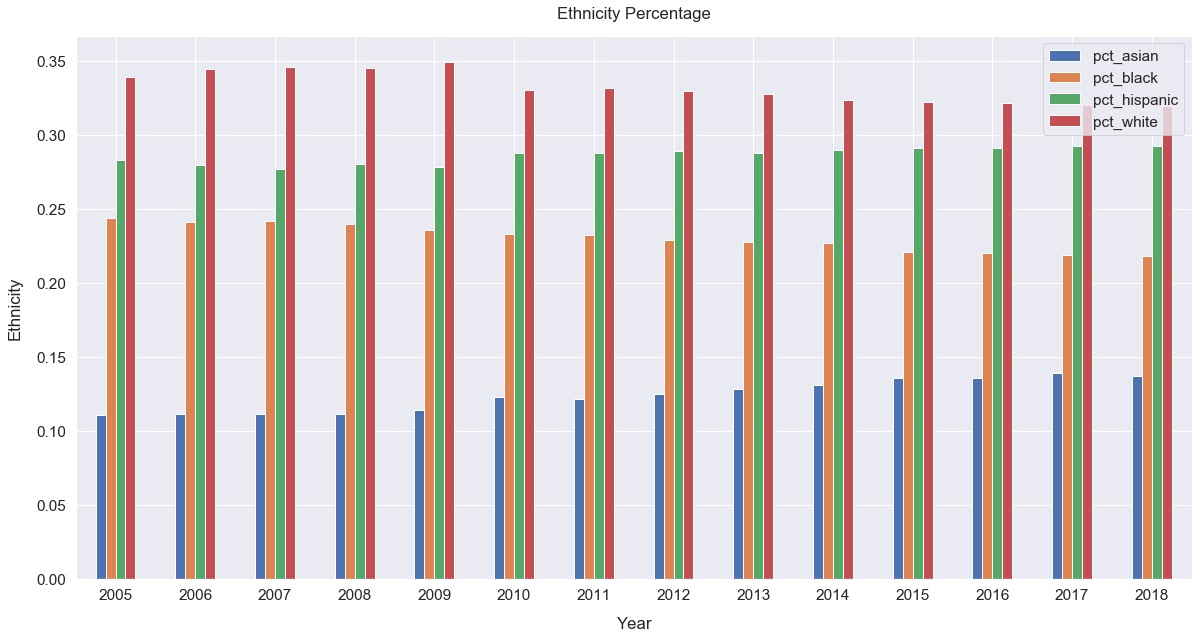

In [126]:
# Compare ethnicities
ethnicity = pd.pivot_table(sub_borough, values= ['pct_asian', 'pct_black', 'pct_hispanic', 'pct_white'], index= 'year')
ethnicity.plot(kind='bar', figsize = (20,10), rot=0, align='center', width = 0.5)
sns.set(font_scale=1.4)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Ethnicity", labelpad=14)
plt.title("Ethnicity Percentage", y=1.02);

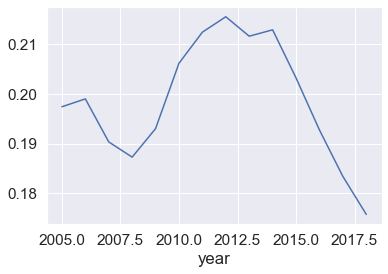

In [127]:
sub_borough.groupby('year')['pov_rate'].mean().plot()

The chart above shows poverty rate over the course of our dataset. There is a spike in rates around 2012 and then a sharp decrease afterwards.

## 5. Correlation Analysis

### 5.1. Correlation Heatmap

Viewing correlation between the variables can help provide insight on which factors to focus when identifying barriers to home ownership.

In [128]:
# Correlation Analysis Table: Sub-Borough Area
sub_borough.corr()

,homeowner_income,year,renter_income,pov_rate,population,home_own_rate,FHA_loans,LMI,hunits,rent_burden,pct_asian,pct_black,pct_hispanic,pct_white
homeowner_income,1.000000,0.094574,0.786065,-0.460246,0.135328,0.098696,-0.299787,-0.484436,0.658725,-0.639420,-0.050407,-0.219152,-0.412156,0.554597
year,0.094574,1.000000,0.114513,-0.018176,0.073893,-0.018552,0.184963,-0.034806,0.064247,0.129459,0.085926,-0.036535,0.023579,-0.036905
renter_income,0.786065,0.114513,1.000000,-0.697128,0.130892,0.269507,-0.363125,-0.660292,0.613915,-0.679553,0.208983,-0.386293,-0.449547,0.614354
pov_rate,-0.460246,-0.018176,-0.697128,1.000000,-0.193345,-0.746871,0.285755,0.877307,-0.366369,0.525082,-0.364088,0.283733,0.612455,-0.565906
population,0.135328,0.073893,0.130892,-0.193345,1.000000,0.186788,0.073542,-0.175739,0.660441,0.027056,0.185815,-0.074989,-0.030354,0.006034
home_own_rate,0.098696,-0.018552,0.269507,-0.746871,0.186788,1.000000,-0.018145,-0.736950,0.029138,-0.159140,0.316332,-0.147838,-0.544413,0.400868
FHA_loans,-0.299787,0.184963,-0.363125,0.285755,0.073542,-0.018145,1.000000,0.250931,-0.198407,0.339930,-0.344927,0.505443,0.199002,-0.484468
LMI,-0.484436,-0.034806,-0.660292,0.877307,-0.175739,-0.736950,0.250931,1.000000,-0.381484,0.513009,-0.344723,0.377406,0.596540,-0.650303
hunits,0.658725,0.064247,0.613915,-0.366369,0.660441,0.029138,-0.198407,-0.381484,1.000000,-0.425704,0.118522,-0.243117,-0.300262,0.420283
rent_burden,-0.639420,0.129459,-0.679553,0.525082,0.027056,-0.159140,0.339930,0.513009,-0.425704,1.000000,0.065922,0.139845,0.376808,-0.464750


(14.0, 0)

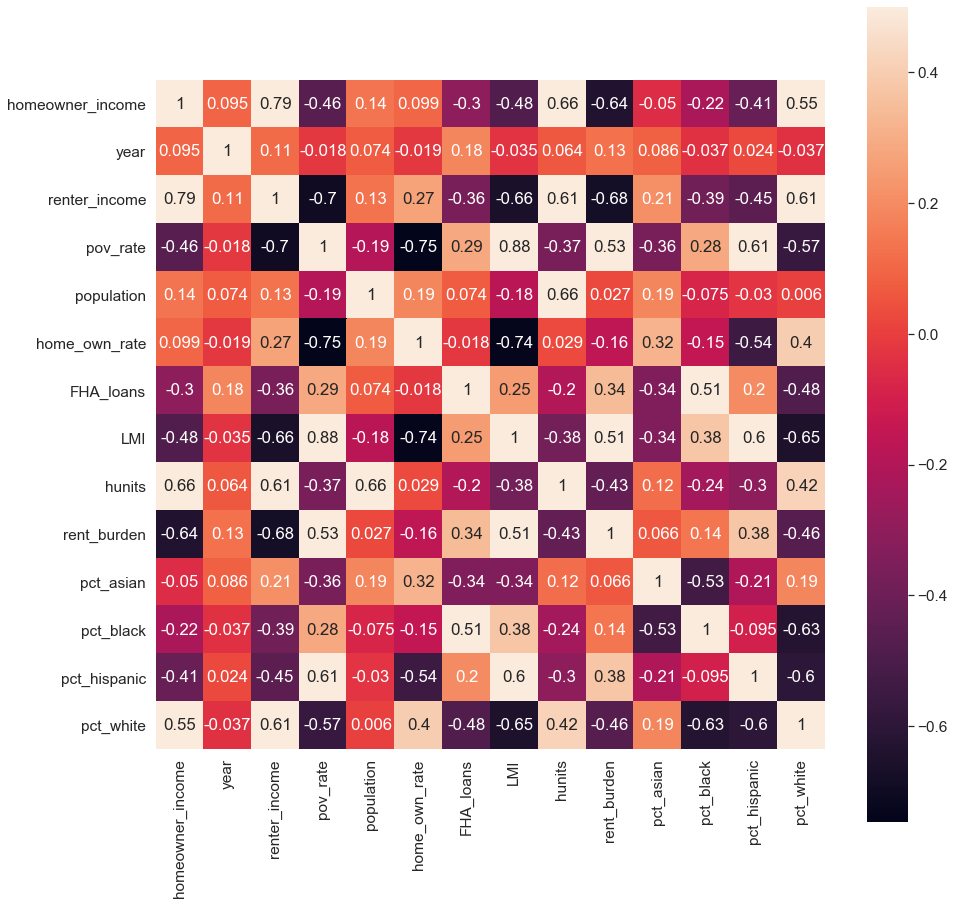

In [129]:
# Correlation heatmap of sub-borough variables
plt.figure(figsize=(15,15))
ax = sns.heatmap(sub_borough.corr(), vmax=.5, square=True, annot=True)
ax.set_ylim(14.0,0)

In [130]:
# Correlation Analysis Table: Community District
community_district.corr()

,single_fam_home_price,year,condo_price,single_fam_home_sales,condo_sales
single_fam_home_price,1.000000,0.060944,0.839504,-0.236832,0.729033
year,0.060944,1.000000,0.130712,-0.108835,-0.048426
condo_price,0.839504,0.130712,1.000000,-0.248624,0.666206
single_fam_home_sales,-0.236832,-0.108835,-0.248624,1.000000,-0.170331
condo_sales,0.729033,-0.048426,0.666206,-0.170331,1.000000


(5.0, 0)

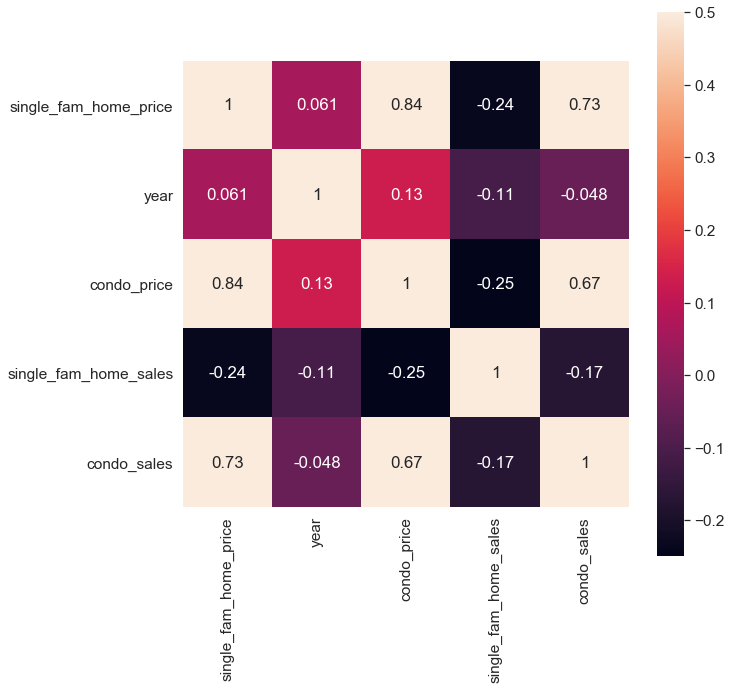

In [131]:
# Correlation heatmap of all variables
plt.figure(figsize=(10,10))
ac = sns.heatmap(community_district.corr(), vmax=.5, square=True, annot=True)
ac.set_ylim(5.0,0)

### 5.2. Correlation Summary

#### 5.2.1. Sub-Borough

**Homeowner Income:**

•	There is a strong positive correlation between homeowner income and the number of housing units that are occupied or intend to be occupied as separate living quarters.

•	There is a very strong positive correlation between homeowner income and renter’s income, meaning we can assume that if the average homeowner income is high in one district, we can also expect the average renter’s income will also be higher.

•	There is a correlation between the homeowner income and LMI borrowers. Expected there to be a higher correlation in this area. 

•	There is a correlation between the homeowner income and poverty rate. Expected there to be a higher correlation in this area. 

•	There is a strong negative correlation between homeowner income and the rent burden. So the more money people make on average the less of a percent of that has to go towards living expenses

**Year:**

•	No correlation with anything.

**Renter Income:**

•	(See homeowner income)

•	Very strong negative correlation with poverty rate. 

•	Very strong negative correlation with LMI borrowers.

•	Very strong negative correlation with rent burden.

•	There is a strong positive correlation between renter income and the number of housing units that are occupied or intend to be occupied as separate living quarters.

There seems to be a correlation in that the higher the average income whether it is based on renter or housing income, the lower the percent of Hispanics and Black people are and higher percent of white people. (Not sure if this is useful but I find it very interesting)

Renter’s Income does a better job about telling about how poor a district is. 

**Poverty Rate:**

•	(see renters’ income)

•	There is a very strong negative correlation between the poverty rate and home own rate.

•	There is a super strong correlation between the poverty rate and LMI borrowers.

•	There is a strong correlation between rent burden and poverty rate.

•	There is a strong correlation between poverty rate and the percent of Hispanics 

•	There is a strong negative correlation between poverty rate and the percent of white.

**Population:**

•	There is a strong positive correlation between the population and the number of housing units that are occupied or intend to be occupied as separate living quarters.

**Homeowner Rate:**

•	(see poverty rate) (Maybe important for answering one of the questions)

•	There is a strong negative correlation between LMI borrowers and homeowner rates(Maybe important for answering one of the questions)

•	There is a strong negative correlation between homeowner rate and percent Hispanics

•	Only a .4 correlation between homeowner rate and percent white

**FHA Loans:**

•	There is a strong correlation between blacks and FHA loans

•	There is a strong negative correlation between whites and FHA loans.

•	Has a bunch of weak correlations with a bunch of different stuff (I know, great analysis)

**LMI:**

•	(See homeowner income)

•	(See renter’s income)

•	(See poverty rate)

•	(See homeowner rate)

•	Strong correlation between rent burden and LMI

•	Strong correlation between Hispanics and LMI

•	Strong negative correlation between white and LMI

•	Strong correlation between rent burden and LMI


**House Units:**

•	(See homeowner income)

•	(See renter income)

•	(see population)

•	(See rent burden)

**Rent Burden:**

•	(See homeowner income)

•	(See renter income)

•	(See poverty rate)

•	(See LMI)

•	(See house units)

#### 5.2.2. Community District

**Single Family Home Price:** 

•	Strong correlation with single family home price and condo price

•	Strong correlation with condo sales

**Year:**

•	No correlation 

**Condo Price:**

•	(See single family home price)

•	Strong correlation with condo sales

**Single Family Home Sales:**

•	No correlation which is very strange 

**Condo Sales:**

•	(See single family home price)

•	(See condo price)

## 6. Business Analytics Summary

In order to make suggestions as to which sub-buroughs should qualify for a pilot program promoting home ownership, we are looking at home units, LMI, poverty rates, rent burden, home ownership rates, renter income, and homeowner income in each of the different sub-boroughs. From this data, we hope to build a model and suggest at least five different sub-boroughs that would be good candidates. We are looking for sub-boroughs with a narrow gap between homeowner and renter incomes along with low homeownership rates, low LMI values, and low rent burden. We deteremined these variables by our correlation analysis and by business intuition. We will also view housing units to make sure there aren't any outliers that we can suggest advocating for government intervention to create more condominiums.

### 6.1. Available Housing Unit Analysis

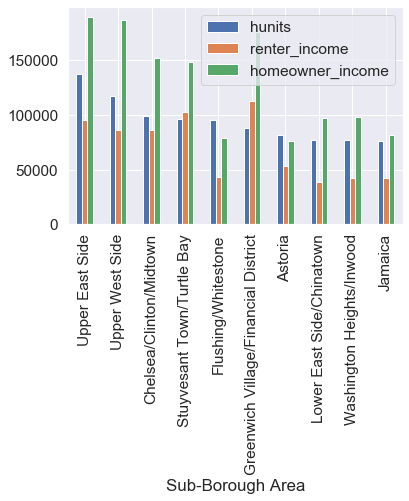

In [132]:
# Visualizing top 10 areas with the most housing units available
home_own.groupby('Sub-Borough Area')[['hunits', 'renter_income', 'homeowner_income']].mean().sort_values(by='hunits', ascending=False).head(10).plot(kind='bar')

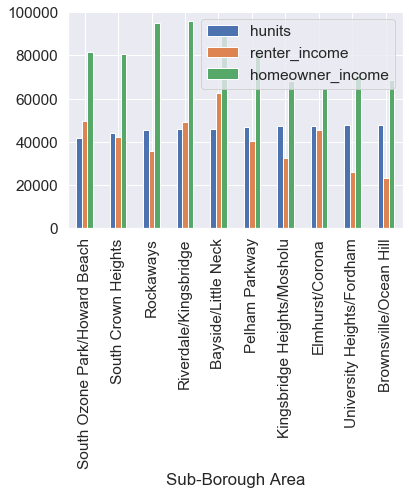

In [133]:
# Visualizing top 10 areas with the least housing units available
home_own.groupby('Sub-Borough Area')[['hunits', 'renter_income', 'homeowner_income']].mean().sort_values(by='hunits', ascending=True).head(10).plot(kind='bar')

In [134]:
# Basic statistics on the sub-borough units
sub_borough['hunits'].describe()

count       770.000000
mean      61721.707792
std       18934.557254
min       39682.000000
25%       49044.000000
50%       55919.500000
75%       67426.000000
max      148515.000000
Name: hunits, dtype: float64

Without more knowledge of the data, such as square kilometers for each sub-borough area, it is hard to recommend whether the government should build more condominiums or tear down older apartments to replace with condominiums in order to provide more opportunities for home ownership.

### 6.2. Identifying Key Variables for Target Areas to Increase Homeownership

In [216]:
# Creating a new column in our dataframe for a difference between homeowner and renter incomes
sub_borough['gap'] = sub_borough['homeowner_income'] - sub_borough['renter_income']
ModelDF = sub_borough.groupby('Sub-Borough Area')['home_own_rate', 'rent_burden', 'LMI', 'pov_rate', 'renter_income', 'homeowner_income', 'gap'].mean().sort_values(by='gap', ascending=True)
ModelDF.head(60)

C:\Users\Tom\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,home_own_rate,rent_burden,LMI,pov_rate,renter_income,homeowner_income,gap
Sub-Borough Area,,,,,,,
Elmhurst/Corona,0.248517,0.366714,0.681266,0.191770,45406.081493,64912.265972,19506.184479
Sunnyside/Woodside,0.274079,0.310857,0.232825,0.128110,57601.950202,77592.493818,19990.543616
Astoria,0.194888,0.296357,0.310912,0.167290,53453.497814,76124.618775,22671.120960
Jackson Heights,0.352451,0.357286,0.499713,0.175851,46870.298596,73697.382471,26827.083876
Middle Village/Ridgewood,0.419482,0.304857,0.115937,0.123198,54554.689862,81983.332159,27428.642297
Bayside/Little Neck,0.701159,0.317786,0.002785,0.074244,62661.464978,91292.284009,28630.819031
Highbridge/South Concourse,0.064365,0.377000,0.978098,0.362874,28289.214597,58774.596384,30485.381788
Williamsburg/Greenpoint,0.166205,0.304286,0.432340,0.276046,52021.485760,82566.686775,30545.201015
Rego Park/Forest Hills,0.450176,0.308929,0.042569,0.097106,59907.317099,90523.236493,30615.919394


### 6.3. Creating a Linear Regression Model

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [137]:
runs_reg_model1 = ols("home_own_rate~rent_burden+pov_rate+LMI+homeowner_income+renter_income",sub_borough)
runs_reg1 = runs_reg_model1.fit()
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:          home_own_rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     448.8
Date:                Tue, 05 May 2020   Prob (F-statistic):          1.56e-224
Time:                        19:22:58   Log-Likelihood:                 726.20
No. Observations:                 770   AIC:                            -1440.
Df Residuals:                     764   BIC:                            -1413.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6675      0.047  

In [138]:
sub_borough['model_values'] = 0.6675 + (sub_borough['rent_burden']*0.7020) + (sub_borough['pov_rate']*-1.3263) + (sub_borough['LMI']*-0.2754) + (sub_borough['homeowner_income']*-.0000002819) + (sub_borough['renter_income']*-0.000003625)
sub_borough.groupby('Sub-Borough Area')['model_values'].mean().sort_values(ascending=False)

Sub-Borough Area
South Shore                             0.570961
Mid-Island                              0.568521
Bayside/Little Neck                     0.538465
Queens Village                          0.537173
Flatlands/Canarsie                      0.534644
South Ozone Park/Howard Beach           0.532180
Flushing/Whitestone                     0.513666
Throgs Neck/Co-op City                  0.507489
Hillcrest/Fresh Meadows                 0.502831
Rego Park/Forest Hills                  0.501170
Sheepshead Bay/Gravesend                0.488312
Jamaica                                 0.476303
North Shore                             0.468202
Middle Village/Ridgewood                0.465312
Ozone Park/Woodhaven                    0.463639
Bay Ridge                               0.426237
Riverdale/Kingsbridge                   0.422549
Sunnyside/Woodside                      0.421009
Williamsbridge/Baychester               0.420317
East Flatbush                           0.392943
Roc

Here, we attempted to create a linear model to maxmize homewownership. In conclusion, even though the r-square value is high and we can create a ranking system, we do not believe it accurately reflects what we are trying to accomplish. We don't need to predict high homeownership, but rather candidates to increase home ownership.

### 6.4. Normalizing Data and Creating New Model

Here, we create a model that attempts to minimize variables that are negatively correlated with home ownership.

In [207]:
NewModelDF = sub_borough.groupby('Sub-Borough Area')['home_own_rate', 'rent_burden', 'LMI', 'pov_rate', 'gap'].mean().sort_values(by='gap', ascending=True)
NewModelDF.head()

C:\Users\Tom\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,home_own_rate,rent_burden,LMI,pov_rate,gap
Sub-Borough Area,,,,,
Elmhurst/Corona,0.248517,0.366714,0.681266,0.191770,19506.184479
Sunnyside/Woodside,0.274079,0.310857,0.232825,0.128110,19990.543616
Astoria,0.194888,0.296357,0.310912,0.167290,22671.120960
Jackson Heights,0.352451,0.357286,0.499713,0.175851,26827.083876
Middle Village/Ridgewood,0.419482,0.304857,0.115937,0.123198,27428.642297


In [208]:
# Standardize data
from sklearn.preprocessing import Normalizer

In [209]:
scaler = Normalizer()
scaler.fit(NewModelDF)

Normalizer(copy=True, norm='l2')

In [210]:
x = NewModelDF.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
NewModelDF2 = pd.DataFrame(x_scaled)
NewModelDF2.columns = ['home_own_rate', 'rent_burden', 'LMI', 'pov_rate', 'gap']
NewModelDF2.head()

,home_own_rate,rent_burden,LMI,pov_rate,gap
0,0.268935,0.683953,0.681266,0.360671,0.000000
1,0.301654,0.364639,0.232825,0.187154,0.005993
2,0.200291,0.281748,0.310912,0.293945,0.039157
3,0.401969,0.630053,0.499713,0.317280,0.090575
4,0.487768,0.330339,0.115937,0.173764,0.098018


In [212]:
# Get Sub-Borough Area Names Back
NewModelDF.reset_index(inplace=True)
Area = NewModelDF['Sub-Borough Area']
FinalDF = NewModelDF2.join(Area)
FinalDF.set_index('Sub-Borough Area', inplace=True)
FinalDF.head()

,home_own_rate,rent_burden,LMI,pov_rate,gap
Sub-Borough Area,,,,,
Elmhurst/Corona,0.268935,0.683953,0.681266,0.360671,0.000000
Sunnyside/Woodside,0.301654,0.364639,0.232825,0.187154,0.005993
Astoria,0.200291,0.281748,0.310912,0.293945,0.039157
Jackson Heights,0.401969,0.630053,0.499713,0.317280,0.090575
Middle Village/Ridgewood,0.487768,0.330339,0.115937,0.173764,0.098018


Now that we have normalized and inputted our final model into a dataframe, we can create a new column that minimizes all of the normalized data columns.

In [215]:
FinalDF['final_model_values'] = (FinalDF['home_own_rate']) + (FinalDF['rent_burden']) + (FinalDF['LMI']) + (FinalDF['pov_rate']) + (FinalDF['gap'])
FinalDF.groupby('Sub-Borough Area')['final_model_values'].mean().sort_values(ascending=True)

Sub-Borough Area
Stuyvesant Town/Turtle Bay              0.841367
Greenwich Village/Financial District    0.939660
Sunnyside/Woodside                      1.092265
Astoria                                 1.126053
Chelsea/Clinton/Midtown                 1.146577
Rego Park/Forest Hills                  1.163338
Throgs Neck/Co-op City                  1.171325
Middle Village/Ridgewood                1.205826
Park Slope/Carroll Gardens              1.273449
Hillcrest/Fresh Meadows                 1.358626
Bay Ridge                               1.387219
Bayside/Little Neck                     1.408568
Upper East Side                         1.409307
Riverdale/Kingsbridge                   1.434910
Queens Village                          1.481414
Flatlands/Canarsie                      1.481904
Brooklyn Heights/Fort Greene            1.517295
Upper West Side                         1.534915
Ozone Park/Woodhaven                    1.598340
South Shore                             1.640850
Wil

From the model above, the top five sub-borough areas that we would recommend to the Loanne & Mort Gage Foundation are **Stuyvesant Town/Turtle Bay, Greenwich Village/Financial District, Sunnyside/Woodside, Astoria, Chelsea/Clinton/Midtown** in that order.

## 7. References

- https://plotly.com/python/renderers/
- https://seaborn.pydata.org/tutorial.html
- https://manhattan.edu/academics/schools-and-departments/school-of-business/business-analytics-competition/index.php
- https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
- Instructor provided raw datasets
- Code from class notes/assignments